In [17]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Prepare dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=5, activation=keras.activations.relu, input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(2, strides=2),
    keras.layers.Conv2D(64, kernel_size=3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2, strides =2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2048),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = keras.activations.softmax)
])

print(model.summary())

model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy", # beacuse output is vector of 10 of possibilites
    metrics= ["accuracy"]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 12, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_19 (Dense)            (None, 1024)             

### Train

In [13]:
model.fit(x_train, y_train , epochs=5, shuffle=True)

Epoch 1/5
1875/1875 [==============================] - 177s 94ms/step - loss: 0.1048 - accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 177s 95ms/step - loss: 0.0876 - accuracy: 0.9764
Epoch 3/5
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0793 - accuracy: 0.9797
Epoch 4/5
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0799 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0842 - accuracy: 0.9808


### Model Evaluate

In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 5s - loss: 0.0491 - accuracy: 0.9884 - 5s/epoch - 15ms/step


[0.04911506175994873, 0.9883999824523926]

true label: 3
1/1 [==============================] - 0s 48ms/step
predicted label: 3


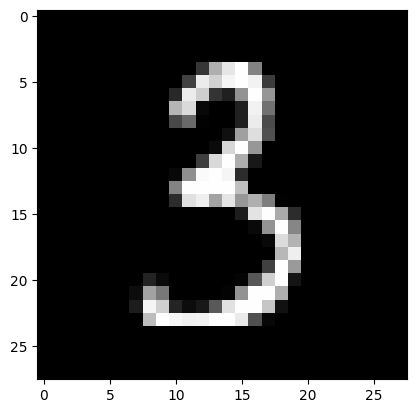

In [19]:
print("true label: %d" % y_test[76])
plt.imshow(x_test[76], cmap="gray")

predictions = model.predict(np.reshape(x_test[76], [-1, 28,28]))
print("predicted label: %d" % np.argmax(predictions))